In [21]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd
import os

In [2]:
file_list = [f"C:/Users/alexl/Documents/GitHub/Meteo/maps/arome_data/2024-08-26T06-00-00Z/{file}" for file in os.listdir('C:/Users/alexl/Documents/GitHub/Meteo/maps/arome_data/2024-08-26T06-00-00Z')]
backend_kwargs = {
    'filter_by_keys': {
        'typeOfLevel': 'heightAboveGround',
        'level': 2
    }
}
datasets = [xr.open_dataset(f, engine='cfgrib', backend_kwargs=backend_kwargs) for f in file_list]
ds = xr.concat(datasets, dim='step')

In [2]:
file_list = [f"C:/Users/alexl/Documents/GitHub/Meteo/maps/arome_data/2024-08-28T15-00-00Z/{file}" for file in os.listdir('C:/Users/alexl/Documents/GitHub/Meteo/maps/arome_data/2024-08-28T15-00-00Z')]
backend_kwargs1 = {
    'filter_by_keys': {
        'paramId': 167,
        'level': 2
    }
}
backend_kwargs2 = {
    'filter_by_keys': {
        'paramId': 228228
    }
}

datasets1 = [xr.open_dataset(f, engine='cfgrib', backend_kwargs=backend_kwargs1) for f in file_list]
ds1 = xr.concat(datasets1, dim='step')
datasets2 = [xr.open_dataset(f, engine='cfgrib', backend_kwargs=backend_kwargs2) for f in file_list]
ds2 = xr.concat(datasets2, dim='step')
ds = xr.merge([ds1, ds2])

In [5]:
ds

<xarray.Dataset> Size: 315MB
Dimensions:            (step: 49, latitude: 717, longitude: 1121)
Coordinates:
  * step               (step) timedelta64[ns] 392B 00:00:00 ... 2 days 00:00:00
  * latitude           (latitude) float64 6kB 55.4 55.38 55.35 ... 37.53 37.5
  * longitude          (longitude) float64 9kB -12.0 -11.97 ... 15.98 16.0
    time               datetime64[ns] 8B 2024-08-28T15:00:00
    heightAboveGround  float64 8B 2.0
    valid_time         (step) datetime64[ns] 392B 2024-08-28T15:00:00 ... 202...
    surface            float64 8B 0.0
Data variables:
    t2m                (step, latitude, longitude) float32 158MB nan nan ... nan
    tp                 (step, latitude, longitude) float32 158MB nan nan ... nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-08-28T22:39 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
ds['t2m'] = ds['t2m'] - 273.15

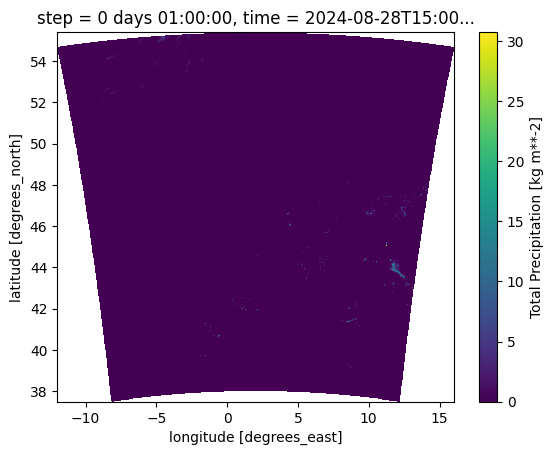

In [9]:
ds.tp[1].plot()

In [35]:
dsf = ds.to_dataframe()
dsf = dsf.reset_index()
#dsf_lat_lon = dsf[['latitude', 'longitude']].values.tolist()
#len(dsf_lat_lon)

In [11]:
dsf

,step,latitude,longitude,t2m,time,heightAboveGround,valid_time,tp,surface
0,0 days,55.4,-12.000,NaN,2024-08-28 15:00:00,2.0,2024-08-28 15:00:00,NaN,0.0
1,0 days,55.4,-11.975,NaN,2024-08-28 15:00:00,2.0,2024-08-28 15:00:00,NaN,0.0
2,0 days,55.4,-11.950,NaN,2024-08-28 15:00:00,2.0,2024-08-28 15:00:00,NaN,0.0
3,0 days,55.4,-11.925,NaN,2024-08-28 15:00:00,2.0,2024-08-28 15:00:00,NaN,0.0
4,0 days,55.4,-11.900,NaN,2024-08-28 15:00:00,2.0,2024-08-28 15:00:00,NaN,0.0
...,...,...,...,...,...,...,...,...,...
39384088,2 days,37.5,15.900,NaN,2024-08-28 15:00:00,2.0,2024-08-30 15:00:00,NaN,0.0
39384089,2 days,37.5,15.925,NaN,2024-08-28 15:00:00,2.0,2024-08-30 15:00:00,NaN,0.0
39384090,2 days,37.5,15.950,NaN,2024-08-28 15:00:00,2.0,2024-08-30 15:00:00,NaN,0.0
39384091,2 days,37.5,15.975,NaN,2024-08-28 15:00:00,2.0,2024-08-30 15:00:00,NaN,0.0


In [12]:
geo_dep = gpd.read_file('geojsonfrance.json')
geo_dep = geo_dep.rename(columns={'code': 'Dep'})
gdf = gpd.read_file('france.json')
geo_dep

,Dep,nom,geometry
0,02,Aisne,"POLYGON ((3.1727 50.012, 3.1822 50.01234, 3.21..."
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ..."
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.3624,..."
3,15,Cantal,"POLYGON ((2.50841 45.4785, 2.52444 45.4807, 2...."
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."
...,...,...,...
91,41,Loir-et-Cher,"POLYGON ((0.84122 48.10306, 0.87588 48.10943, ..."
92,53,Mayenne,"POLYGON ((-0.86036 48.50146, -0.84611 48.49828..."
93,54,Meurthe-et-Moselle,"MULTIPOLYGON (((5.45556 49.48093, 5.44953 49.4..."
94,79,Deux-Sèvres,"POLYGON ((-0.89196 46.97582, -0.87973 46.9758,..."


In [31]:
#minx, miny, maxx, maxy = gdf.total_bounds.round(3)
minx, miny, maxx, maxy = -4.600, 41.400, 9.575, 51.150
print(minx, miny, maxx, maxy)
resolution = 0.025
x_coords = np.arange(minx, maxx, resolution)
y_coords = np.arange(miny, maxy, resolution)
grid_points = [[round(x, 3), round(y, 3)] for x in x_coords for y in y_coords]
grid_points
#len(grid_points)

-4.6 41.4 9.575 51.15


[[-4.6, 41.4],
 [-4.6, 41.425],
 [-4.6, 41.45],
 [-4.6, 41.475],
 [-4.6, 41.5],
 [-4.6, 41.525],
 [-4.6, 41.55],
 [-4.6, 41.575],
 [-4.6, 41.6],
 [-4.6, 41.625],
 [-4.6, 41.65],
 [-4.6, 41.675],
 [-4.6, 41.7],
 [-4.6, 41.725],
 [-4.6, 41.75],
 [-4.6, 41.775],
 [-4.6, 41.8],
 [-4.6, 41.825],
 [-4.6, 41.85],
 [-4.6, 41.875],
 [-4.6, 41.9],
 [-4.6, 41.925],
 [-4.6, 41.95],
 [-4.6, 41.975],
 [-4.6, 42.0],
 [-4.6, 42.025],
 [-4.6, 42.05],
 [-4.6, 42.075],
 [-4.6, 42.1],
 [-4.6, 42.125],
 [-4.6, 42.15],
 [-4.6, 42.175],
 [-4.6, 42.2],
 [-4.6, 42.225],
 [-4.6, 42.25],
 [-4.6, 42.275],
 [-4.6, 42.3],
 [-4.6, 42.325],
 [-4.6, 42.35],
 [-4.6, 42.375],
 [-4.6, 42.4],
 [-4.6, 42.425],
 [-4.6, 42.45],
 [-4.6, 42.475],
 [-4.6, 42.5],
 [-4.6, 42.525],
 [-4.6, 42.55],
 [-4.6, 42.575],
 [-4.6, 42.6],
 [-4.6, 42.625],
 [-4.6, 42.65],
 [-4.6, 42.675],
 [-4.6, 42.7],
 [-4.6, 42.725],
 [-4.6, 42.75],
 [-4.6, 42.775],
 [-4.6, 42.8],
 [-4.6, 42.825],
 [-4.6, 42.85],
 [-4.6, 42.875],
 [-4.6, 42.9],
 [-4.6, 42

In [32]:
df = pd.DataFrame(grid_points, columns=['longitude', 'latitude'])
df.to_csv('france_coords_0025.csv')

In [36]:
lat_lon = pd.read_csv('france_coords_0025.csv')[['longitude', 'latitude']]
dsf['latitude'] = round(dsf['latitude'], 3)
dsf['longitude'] = round(dsf['longitude'], 3)

dsf_france = pd.merge(dsf, lat_lon, on=['latitude', 'longitude'], how='inner')
dsf_france

,step,latitude,longitude,t2m,time,heightAboveGround,valid_time,tp,surface
0,0 days,51.125,-4.600,17.193542,2024-08-28 15:00:00,2.0,2024-08-28 15:00:00,NaN,0.0
1,0 days,51.125,-4.575,17.182800,2024-08-28 15:00:00,2.0,2024-08-28 15:00:00,NaN,0.0
2,0 days,51.125,-4.550,17.177917,2024-08-28 15:00:00,2.0,2024-08-28 15:00:00,NaN,0.0
3,0 days,51.125,-4.525,17.173035,2024-08-28 15:00:00,2.0,2024-08-28 15:00:00,NaN,0.0
4,0 days,51.125,-4.500,17.159363,2024-08-28 15:00:00,2.0,2024-08-28 15:00:00,NaN,0.0
...,...,...,...,...,...,...,...,...,...
10835365,2 days,41.400,9.450,27.984680,2024-08-28 15:00:00,2.0,2024-08-30 15:00:00,0.0,0.0
10835366,2 days,41.400,9.475,27.900696,2024-08-28 15:00:00,2.0,2024-08-30 15:00:00,0.0,0.0
10835367,2 days,41.400,9.500,27.879211,2024-08-28 15:00:00,2.0,2024-08-30 15:00:00,0.0,0.0
10835368,2 days,41.400,9.525,27.813782,2024-08-28 15:00:00,2.0,2024-08-30 15:00:00,0.0,0.0


In [37]:
mean_dsf_france = dsf_france.groupby(['latitude', 'longitude']).mean().reset_index()[['latitude', 'longitude', 't2m', 'tp']]
mean_dsf_france

,latitude,longitude,t2m,tp
0,41.400,-4.600,22.686144,5.460999
1,41.400,-4.575,22.841757,2.865479
2,41.400,-4.550,22.866730,2.346069
3,41.400,-4.525,22.388372,4.793722
4,41.400,-4.500,22.325535,4.666891
...,...,...,...,...
221125,51.125,9.450,23.208206,0.174825
221126,51.125,9.475,22.710619,0.163574
221127,51.125,9.500,22.294304,0.212585
221128,51.125,9.525,22.853476,0.204753


In [38]:
ds_plot = mean_dsf_france.set_index(['latitude', 'longitude']).to_xarray()

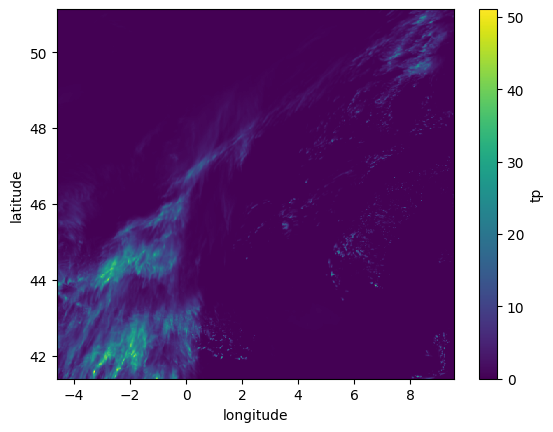

In [40]:
ds_plot.tp.plot()

### STOP ICI -> Il faut tout round tous les lat/long des deps comme pour les extremes de la france en 0.125, 0.150, 0.175, 0.200, 0.225...

In [6]:
df_dep = pd.read_csv('points-extremes-des-departements-metropolitains-de-france.csv')
df_dep = df_dep.rename(columns={'Departement': 'Dep',
                                'Latitude la plus au nord': 'LatMax',
                                'Latitude la plus au sud': 'LatMin',
                                'Longitude la plus à l’est': 'LongMax', 
                                'Longitude la plus à l’ouest': 'LongMin'})
df_dep = round(df_dep, 3)
df_dep

,Dep,LatMax,LatMin,LongMax,LongMin
0,01,46.517,45.611,6.170,4.729
1,02,50.069,48.838,4.254,2.962
2,03,46.804,45.931,4.006,2.280
3,04,44.660,43.668,6.967,5.498
4,05,45.127,44.186,7.077,5.419
...,...,...,...,...,...
91,93,49.012,48.807,2.603,2.288
92,94,48.861,48.688,2.614,2.310
93,95,49.232,48.909,2.591,1.609
94,2A,42.381,41.362,9.407,8.540


In [4]:
def round_to_nearest_0025(x):
    return round(x * 40) / 40

In [7]:
df_dep['LatMax'] = df_dep['LatMax'].apply(round_to_nearest_0025)
df_dep['LatMin'] = df_dep['LatMin'].apply(round_to_nearest_0025)
df_dep['LongMax'] = df_dep['LongMax'].apply(round_to_nearest_0025)
df_dep['LongMin'] = df_dep['LongMin'].apply(round_to_nearest_0025)

In [9]:
lst = []
resolution = 0.025
for i, row in df_dep.iterrows():
    x_coords = np.arange(row['LongMin'], row['LongMax'], resolution)
    y_coords = np.arange(row['LatMin'], row['LatMax'], resolution)
    grid_points = [Point(round(x, 3), round(y, 3)) for x in x_coords for y in y_coords]
    lst.append(grid_points)
df_dep['grid_points'] = lst

In [13]:
df_dep = pd.merge(df_dep, geo_dep, on='Dep', how='inner')

In [14]:
df_dep

,Dep,LatMax,LatMin,LongMax,LongMin,grid_points,nom,geometry
0,01,46.525,45.600,6.175,4.725,"[POINT (4.725 45.6), POINT (4.725 45.625), POI...",Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,50.075,48.850,4.250,2.950,"[POINT (2.95 48.85), POINT (2.95 48.875), POIN...",Aisne,"POLYGON ((3.1727 50.012, 3.1822 50.01234, 3.21..."
2,03,46.800,45.925,4.000,2.275,"[POINT (2.275 45.925), POINT (2.275 45.95), PO...",Allier,"POLYGON ((3.03206 46.79491, 3.03684 46.7844, 3..."
3,04,44.650,43.675,6.975,5.500,"[POINT (5.5 43.675), POINT (5.5 43.7), POINT (...",Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
4,05,45.125,44.175,7.075,5.425,"[POINT (5.425 44.175), POINT (5.425 44.2), POI...",Hautes-Alpes,"POLYGON ((6.26057 45.12684, 6.2755 45.1153, 6...."
...,...,...,...,...,...,...,...,...
91,93,49.000,48.800,2.600,2.300,"[POINT (2.3 48.8), POINT (2.3 48.825), POINT (...",Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.56579 49.0124, 2..."
92,94,48.850,48.700,2.625,2.300,"[POINT (2.3 48.7), POINT (2.3 48.725), POINT (...",Val-de-Marne,"POLYGON ((2.3319 48.81701, 2.36395 48.81631, 2..."
93,95,49.225,48.900,2.600,1.600,"[POINT (1.6 48.9), POINT (1.6 48.925), POINT (...",Val-d'Oise,"POLYGON ((1.70436 49.2322, 1.72966 49.2292, 1...."
94,2A,42.375,41.350,9.400,8.550,"[POINT (8.55 41.35), POINT (8.55 41.375), POIN...",Corse-du-Sud,"MULTIPOLYGON (((9.27103 41.36496, 9.2657 41.36..."


In [16]:
list_dep = []
for i, row in df_dep.iterrows():
    mask = row['geometry'].contains(row['grid_points'])
    dep_points = np.array(row['grid_points'])[np.array(mask)]
    list_dep.append(dep_points)
df_dep['dep_points'] = list_dep

In [17]:
df_dep

,Dep,LatMax,LatMin,LongMax,LongMin,grid_points,nom,geometry,dep_points
0,01,46.525,45.600,6.175,4.725,"[POINT (4.725 45.6), POINT (4.725 45.625), POI...",Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...","[POINT (4.75 45.95), POINT (4.75 46), POINT (4..."
1,02,50.075,48.850,4.250,2.950,"[POINT (2.95 48.85), POINT (2.95 48.875), POIN...",Aisne,"POLYGON ((3.1727 50.012, 3.1822 50.01234, 3.21...","[POINT (2.975 49.2), POINT (2.975 49.225), POI..."
2,03,46.800,45.925,4.000,2.275,"[POINT (2.275 45.925), POINT (2.275 45.95), PO...",Allier,"POLYGON ((3.03206 46.79491, 3.03684 46.7844, 3...","[POINT (2.3 46.4), POINT (2.3 46.425), POINT (..."
3,04,44.650,43.675,6.975,5.500,"[POINT (5.5 43.675), POINT (5.5 43.7), POINT (...",Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...","[POINT (5.5 44.075), POINT (5.525 43.95), POIN..."
4,05,45.125,44.175,7.075,5.425,"[POINT (5.425 44.175), POINT (5.425 44.2), POI...",Hautes-Alpes,"POLYGON ((6.26057 45.12684, 6.2755 45.1153, 6....","[POINT (5.425 44.425), POINT (5.45 44.375), PO..."
...,...,...,...,...,...,...,...,...,...
91,93,49.000,48.800,2.600,2.300,"[POINT (2.3 48.8), POINT (2.3 48.825), POINT (...",Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.56579 49.0124, 2...","[POINT (2.3 48.95), POINT (2.325 48.95), POINT..."
92,94,48.850,48.700,2.625,2.300,"[POINT (2.3 48.7), POINT (2.3 48.725), POINT (...",Val-de-Marne,"POLYGON ((2.3319 48.81701, 2.36395 48.81631, 2...","[POINT (2.325 48.75), POINT (2.325 48.775), PO..."
93,95,49.225,48.900,2.600,1.600,"[POINT (1.6 48.9), POINT (1.6 48.925), POINT (...",Val-d'Oise,"POLYGON ((1.70436 49.2322, 1.72966 49.2292, 1....","[POINT (1.625 49.1), POINT (1.65 49.1), POINT ..."
94,2A,42.375,41.350,9.400,8.550,"[POINT (8.55 41.35), POINT (8.55 41.375), POIN...",Corse-du-Sud,"MULTIPOLYGON (((9.27103 41.36496, 9.2657 41.36...","[POINT (8.575 42.175), POINT (8.575 42.225), P..."


In [18]:
df_dep['dep_coords'] = df_dep['dep_points'].apply(lambda points: np.array([[point.x, point.y] for point in points]))

In [31]:
df_exploded = df_dep.explode('dep_coords')
df_exploded[['longitude', 'latitude']] = pd.DataFrame(df_exploded['dep_coords'].tolist(), index=df_exploded.index)
df_multiindex = df_exploded.set_index(['Dep', 'nom'])
df_multiindex[['longitude', 'latitude']].to_csv('coords_dep_0025.csv')